In [1]:
import pandas as pd
import numpy as np

ratingsAll = pd.read_csv("ratingGrid.csv")
dataArr = ratingsAll.as_matrix()
users = pd.read_csv("users_catergory.csv")
moviesCat = pd.read_csv("movies_catergory.csv")


In [2]:
#average rating of each movie group
totalArr = np.zeros(12)
countArr = np.zeros(12)
for i in range(len(dataArr)):
    movieArr = moviesCat.ix[moviesCat['MovieID'] == i, 'Type2']
    if (len(movieArr == 1)):
        movieType = movieArr.item()
        for j in range(len(dataArr[0])):
            if (dataArr[i][j] != 0):
                totalArr[movieType] = totalArr[movieType] + dataArr[i][j]
                countArr[movieType] = countArr[movieType] + 1
avgArr = totalArr / countArr
print avgArr

[ 3.930783    2.59322718  4.08012285  4.25825393  3.57095497  4.16815542
  3.20973954  3.77931279  3.61730528  2.72044099  3.27898573  3.2612342 ]


[ 3.930783    2.59322718  4.08012285  4.25825393  3.57095497  4.16815542
  3.20973954  3.77931279  3.61730528  2.72044099  3.27898573  3.2612342 ]

In [3]:
#avg rating each user group
totalArr = np.zeros(16)
countArr = np.zeros(16)
for j in range(len(dataArr[0])):
    userArr = users.ix[users['UserID'] == j, 'Type2']
    if (len(userArr == 1)):
        userType = userArr.item()
        for i in range(len(dataArr)):
            if (dataArr[i][j] != 0):
                totalArr[userType] = totalArr[userType] + dataArr[i][j]
                countArr[userType] = countArr[userType] + 1
avgArr = totalArr / countArr
print avgArr

[ 3.48702512  3.57504108  3.88252971  3.53243973  3.53990581  3.46129897
  3.52015877  3.43766146  3.6303506   3.62569237  3.65205741  3.53638223
  3.76283012  3.46808511  3.86387996  3.69704336]


[ 3.48702512  3.57504108  3.88252971  3.53243973  3.53990581  3.46129897
  3.52015877  3.43766146  3.6303506   3.62569237  3.65205741  3.53638223
  3.76283012  3.46808511  3.86387996  3.69704336]

In [4]:
#numbers of demographics
genderVec = ['F', 'M']
ageVec = [1, 18, 25, 35, 45, 50, 56]
occVec = {0:"other", 1: "academic/educator", 2: "artist", 3: "clerical/admin", 4: "college/grad student",
          5:"customer service", 6:"doctor/health care", 7:"executive/managerial", 8:"farmer",
          9:"homemaker", 10:"K-12 student", 11:"lawyer", 12:"programmer", 13:"retired", 14:"sales/marketing",
          15:"scientist",16:"self-employed", 17:"technician/engineer", 18:"tradesman/craftsman", 19:"unemployed",
          20: "writer"}
occCount = {"academic/educator":0, "artist":0, "clerical/admin":0, "college/grad student":0,
          "customer service":0, "doctor/health care":0, "executive/managerial":0, "farmer":0,
          "homemaker":0, "K-12 student":0, "lawyer":0, "programmer":0, "retired":0, "sales/marketing":0,
          "scientist":0,"self-employed":0, "technician/engineer":0, "tradesman/craftsman":0, "unemployed":0,
          "writer":0}

genderCount = np.zeros(2)
ageCount = np.zeros(7)
count = 0
for g in genderVec:
    arr = users.ix[users['Gender'] == g]
    genderCount[count] = len(arr)
    count = count + 1
count = 0
for a in ageVec:
    arr = users.ix[users['Age'] == a]
    ageCount[count] = len(arr)
    count = count + 1
count = 0
for o in range(21):
    arr = users.ix[users['Occupation'] == o]
    occ = occVec[o]
    occCount[occ] = len(arr)
    count = count + 1
    
print genderCount
print ageCount
print occCount

[ 1709.  4331.]
[  222.  1103.  2096.  1193.   550.   496.   380.]
{'executive/managerial': 679, 'writer': 281, 'retired': 142, 'unemployed': 72, 'artist': 267, 'customer service': 112, 'academic/educator': 528, 'college/grad student': 759, 'clerical/admin': 173, 'tradesman/craftsman': 70, 'technician/engineer': 502, 'self-employed': 241, 'scientist': 144, 'lawyer': 129, 'farmer': 17, 'programmer': 388, 'other': 711, 'K-12 student': 195, 'sales/marketing': 302, 'homemaker': 92, 'doctor/health care': 236}


[ 1709.  4331.]
[  222.  1103.  2096.  1193.   550.   496.   380.]
{'executive/managerial': 679, 'writer': 281, 'retired': 142, 'unemployed': 72, 'artist': 267, 'customer service': 112, 'academic/educator': 528, 'college/grad student': 759, 'clerical/admin': 173, 'tradesman/craftsman': 70, 'technician/engineer': 502, 'self-employed': 241, 'scientist': 144, 'lawyer': 129, 'farmer': 17, 'programmer': 388, 'other': 711, 'K-12 student': 195, 'sales/marketing': 302, 'homemaker': 92, 'doctor/health care': 236}

In [5]:
groupCount = [344, 382, 589, 890, 525, 76, 200, 121, 220, 745, 435, 341, 623, 61, 142, 347]
movieCount = [354, 1184, 23, 20, 146, 71, 601, 134, 400, 493, 368, 159]


385.01694915    14.78969595  2265.          2256.5         1008.21232877
  1117.92957746   404.8202995    987.99253731   127.36         146.26774848
    43.61684783    50.24528302]
[  365.53197674   237.37434555   150.28183362    34.11685393   180.78285714
  1035.43421053   488.745        735.78512397   435.48636364   127.22550336
    74.63908046    58.80058651    55.67255217    81.67213115    45.99295775
    43.86167147]

In [6]:
#percentage overall
genderPer = (genderCount) / 6040
agePer = (ageCount) / 6040

occCount2 = np.array([711.0, 528.0,267.0,173.0,759.0,112.0,236.0,679.0,17.0,92.0,195.0,129.0
                      ,388.0,142.0,302.0,144.0,241.0,502.0,70.0,72.0,281.0])
occPer = (occCount2) / 6040
print genderPer
print agePer
print occPer

[ 0.28294702  0.71705298]
[ 0.03675497  0.18261589  0.34701987  0.19751656  0.0910596   0.08211921
  0.06291391]
[ 0.11771523  0.08741722  0.0442053   0.02864238  0.12566225  0.01854305
  0.03907285  0.11241722  0.00281457  0.01523179  0.03228477  0.02135762
  0.06423841  0.02350993  0.05        0.02384106  0.03990066  0.08311258
  0.0115894   0.01192053  0.04652318]


[ 0.28294702  0.71705298]
[ 0.03675497  0.18261589  0.34701987  0.19751656  0.0910596   0.08211921
  0.06291391]
[ 0.11771523  0.08741722  0.0442053   0.02864238  0.12566225  0.01854305
  0.03907285  0.11241722  0.00281457  0.01523179  0.03228477  0.02135762
  0.06423841  0.02350993  0.05        0.02384106  0.03990066  0.08311258
  0.0115894   0.01192053  0.04652318]

In [7]:
ratings = pd.read_csv('ratings.csv')
del ratings['Timestamp']
ratings.head()

,UserID,MovieID,Rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [8]:
ratingsAll0 = pd.merge(ratings, users, on='UserID', how='outer')
del ratingsAll0['Unnamed: 0']
del ratingsAll0['Zip-code']
del ratingsAll0['Type']
del ratingsAll0['Type1']
del ratingsAll0['newID']
ratingsAll0['UserAvg'] = ratingsAll0['Average']
ratingsAll0['UserType'] = ratingsAll0['Type2']
del ratingsAll0['Type2']
del ratingsAll0['Average']
ratingsAll0.head()

,UserID,MovieID,Rating,Gender,Age,Occupation,UserAvg,UserType
0,1,1193,5,F,1,10,4.188679,10
1,1,661,3,F,1,10,4.188679,10
2,1,914,3,F,1,10,4.188679,10
3,1,3408,4,F,1,10,4.188679,10
4,1,2355,5,F,1,10,4.188679,10


In [9]:
ratingsAll1 = pd.merge(ratingsAll0, moviesCat, on='MovieID', how='outer')
del ratingsAll1['Unnamed: 0']
del ratingsAll1['Unnamed: 0.1']
del ratingsAll1['Title']
del ratingsAll1['Genres']
del ratingsAll1['Type']
del ratingsAll1['Type1']
del ratingsAll1['newID']
ratingsAll1['MovieAvg'] = ratingsAll1['Average']
ratingsAll1['MovieType'] = ratingsAll1['Type2']
del ratingsAll1['Average']
del ratingsAll1['Type2']
ratingsAll1.head()

,UserID,MovieID,Rating,Gender,Age,Occupation,UserAvg,UserType,MovieAvg,MovieType
0,1.0,1193.0,5.0,F,1.0,10.0,4.188679,10.0,4.390725,5
1,2.0,1193.0,5.0,M,56.0,16.0,3.703125,4.0,4.390725,5
2,12.0,1193.0,4.0,M,25.0,12.0,3.772727,3.0,4.390725,5
3,15.0,1193.0,4.0,M,25.0,7.0,3.310000,4.0,4.390725,5
4,17.0,1193.0,5.0,M,50.0,1.0,4.038095,9.0,4.390725,5


In [10]:
movieGenre = pd.read_csv('MovieGenre.csv')
del movieGenre['Unnamed: 0']
del movieGenre['Genres']
movieGenre.head()

,MovieID,Average,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,numGenres
0,1,4.146846,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,2,3.201141,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,3,3.016736,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
3,4,2.729412,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,5,3.006757,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
ratingsAll2 = pd.merge(ratingsAll0, movieGenre, on='MovieID', how='outer')
del ratingsAll2['UserType']
ratingsAll2['MovieAvg'] = ratingsAll2['Average']
del ratingsAll2['Average']
ratingsAll2.head()

,UserID,MovieID,Rating,Gender,Age,Occupation,UserAvg,Action,Adventure,Animation,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,numGenres,MovieAvg
0,1.0,1193.0,5.0,F,1.0,10.0,4.188679,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.390725
1,2.0,1193.0,5.0,M,56.0,16.0,3.703125,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.390725
2,12.0,1193.0,4.0,M,25.0,12.0,3.772727,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.390725
3,15.0,1193.0,4.0,M,25.0,7.0,3.310000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.390725
4,17.0,1193.0,5.0,M,50.0,1.0,4.038095,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.390725


In [12]:
ratingsAll3 = pd.merge(ratingsAll0, movieGenre, on='MovieID', how='outer')
ratingsAll3['MovieAvg'] = ratingsAll3['Average']
del ratingsAll3['Average']
ratingsAll3.head()

,UserID,MovieID,Rating,Gender,Age,Occupation,UserAvg,UserType,Action,Adventure,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,numGenres,MovieAvg
0,1.0,1193.0,5.0,F,1.0,10.0,4.188679,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.390725
1,2.0,1193.0,5.0,M,56.0,16.0,3.703125,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.390725
2,12.0,1193.0,4.0,M,25.0,12.0,3.772727,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.390725
3,15.0,1193.0,4.0,M,25.0,7.0,3.310000,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.390725
4,17.0,1193.0,5.0,M,50.0,1.0,4.038095,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.390725


In [13]:
moviesCatTemp = moviesCat.copy()[['MovieID', 'Type2']]
moviesCatTemp['MovieType'] = moviesCatTemp['Type2']
del moviesCatTemp['Type2']
moviesCatTemp.head()

,MovieID,MovieType
0,1,3
1,2,6
2,3,6
3,4,9
4,5,6


In [14]:
ratingsAll4 = pd.merge(ratingsAll3, moviesCatTemp, on='MovieID', how='outer')

ratingsAll4.head()

,UserID,MovieID,Rating,Gender,Age,Occupation,UserAvg,UserType,Action,Adventure,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,numGenres,MovieAvg,MovieType
0,1.0,1193.0,5.0,F,1.0,10.0,4.188679,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.390725,5
1,2.0,1193.0,5.0,M,56.0,16.0,3.703125,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.390725,5
2,12.0,1193.0,4.0,M,25.0,12.0,3.772727,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.390725,5
3,15.0,1193.0,4.0,M,25.0,7.0,3.310000,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.390725,5
4,17.0,1193.0,5.0,M,50.0,1.0,4.038095,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.390725,5


In [15]:
genres = ['Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime',
          'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
          'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

ratingsCountGenre = np.zeros(18)
genreCount = np.zeros(18)
for i in range(18):
    arr = ratingsAll2.ix[ratingsAll2[genres[i]] == 1]
    arrLen = len(arr)
    ratingsCountGenre[i] = float(arrLen)
    arr2 = movieGenre.ix[movieGenre[genres[i]] == 1]
    arrLen2 = len(arr2)
    genreCount[i] = float(arrLen2)
    
ratingsPerGenreGroup = ratingsCountGenre / genreCount
print genreCount
print ratingsCountGenre
for i in range(18):
    print genres[i], ' ', ratingsPerGenreGroup[i]


[  503.   283.   105.   251.  1200.   211.   127.  1603.    68.    44.
   343.   114.   106.   471.   276.   492.   143.    68.]
[ 257465.  133955.   43293.   72187.  356617.   79551.    7927.  354639.
   36301.   18261.   76390.   41534.   40180.  147535.  157296.  189687.
   68529.   20684.]
Action   511.858846918
Adventure   473.339222615
Animation   412.314285714
Children's   287.597609562
Comedy   297.180833333
Crime   377.018957346
Documentary   62.4173228346
Drama   221.2345602
Fantasy   533.838235294
Film-Noir   415.022727273
Horror   222.711370262
Musical   364.333333333
Mystery   379.056603774
Romance   313.237791932
Sci-Fi   569.913043478
Thriller   385.542682927
War   479.223776224
Western   304.176470588


[  503.   283.   105.   251.  1200.   211.   127.  1603.    68.    44.
   343.   114.   106.   471.   276.   492.   143.    68.]
[ 257465.  133955.   43293.   72187.  356617.   79551.    7927.  354639.
   36301.   18261.   76390.   41534.   40180.  147535.  157296.  189687.
   68529.   20684.]
Action   511.858846918
Adventure   473.339222615
Animation   412.314285714
Children's   287.597609562
Comedy   297.180833333
Crime   377.018957346
Documentary   62.4173228346
Drama   221.2345602
Fantasy   533.838235294
Film-Noir   415.022727273
Horror   222.711370262
Musical   364.333333333
Mystery   379.056603774
Romance   313.237791932
Sci-Fi   569.913043478
Thriller   385.542682927
War   479.223776224
Western   304.176470588

In [16]:
ratingsCountMovie = np.zeros(12)
ratingsCountUser = np.zeros(16)
for i in range(12):
    arr = ratingsAll1.ix[(ratingsAll1['MovieType'] == i)]
    arrLen = len(arr)
    ratingsCountMovie[i] = arrLen
for i in range(16):
    arr = ratingsAll1.ix[(ratingsAll1['UserType'] == i)]
    arrLen = len(arr)
    ratingsCountUser[i] = arrLen
    
ratingsPerMovieGroup = ratingsCountMovie / movieCount
ratingsPerUserGroup = ratingsCountUser / groupCount
print ratingsCountMovie
print ratingsCountUser
print ratingsPerMovieGroup
print ratingsPerUserGroup

[ 136296.   17511.   52095.   45130.  147199.   79373.  243297.  132391.
   50944.   72110.   16051.    7989.]
[ 125743.   90677.   88516.   30364.   94911.   78693.   97749.   89030.
   95807.   94783.   32468.   20051.   34684.    4982.    6531.   15220.]
[  385.01694915    14.78969595  2265.          2256.5         1008.21232877
  1117.92957746   404.8202995    987.99253731   127.36         146.26774848
    43.61684783    50.24528302]
[  365.53197674   237.37434555   150.28183362    34.11685393   180.78285714
  1035.43421053   488.745        735.78512397   435.48636364   127.22550336
    74.63908046    58.80058651    55.67255217    81.67213115    45.99295775
    43.86167147]


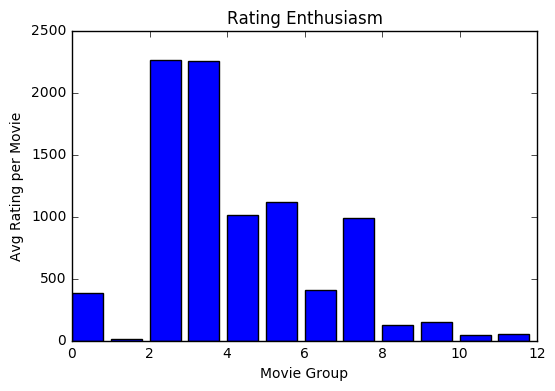

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(12), ratingsPerMovieGroup)
plt.ylabel('Avg Rating per Movie')
plt.xlabel('Movie Group')
plt.title('Rating Enthusiasm')
plt.show()

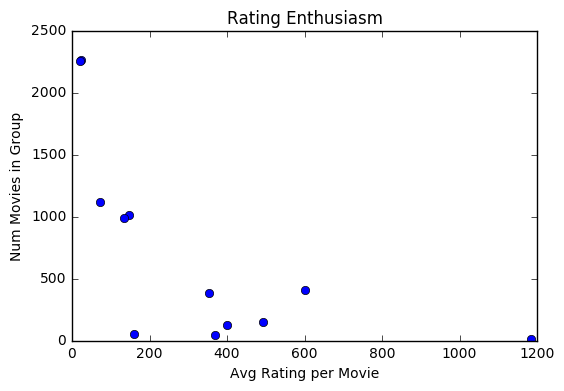

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(movieCount, ratingsPerMovieGroup, 'o')
plt.ylabel('Num Movies in Group')
plt.xlabel('Avg Rating per Movie')
plt.title('Rating Enthusiasm')
plt.show()

[ 136296.   17511.   52095.   45130.  147199.   79373.  243297.  132391.
   50944.   72110.   16051.    7989.]
[ 125743.   90677.   88516.   30364.   94911.   78693.   97749.   89030.
   95807.   94783.   32468.   20051.   34684.    4982.    6531.   15220.]
[  385.01694915    14.78969595  2265.          2256.5         1008.21232877
  1117.92957746   404.8202995    987.99253731   127.36         146.26774848
    43.61684783    50.24528302]
[  365.53197674   237.37434555   150.28183362    34.11685393   180.78285714
  1035.43421053   488.745        735.78512397   435.48636364   127.22550336
    74.63908046    58.80058651    55.67255217    81.67213115    45.99295775
    43.86167147]

In [90]:
#male/female in user groups
import copy
genderInGroup = np.zeros((2, 16))
groupInGenderPor = np.zeros((2, 16))

for i in range(len(groupCount)):
    count = 0
    for j in genderVec:
        arr = users.ix[(users['Gender'] == j) & (users['Type2'] == i)]
        lenArr = len(arr)
        genderInGroup[count, i] = lenArr
        groupInGenderPor[count, i] = float(lenArr) / groupCount[i]
        count = count + 1
        
genderRep = copy.copy(groupInGenderPor)
for j in range(len(genderPer)):
    genderRep[j] = genderRep[j] - genderPer[j]
print genderInGroup
print groupInGenderPor
print genderRep

[[  33.  183.  152.  308.  145.   15.   49.   28.   44.   86.  236.   88.
   222.   17.   42.   61.]
 [ 311.  199.  437.  581.  380.   61.  151.   93.  176.  659.  199.  253.
   401.   44.  100.  286.]]
[[ 0.09593023  0.47905759  0.25806452  0.34606742  0.27619048  0.19736842
   0.245       0.23140496  0.2         0.11543624  0.54252874  0.25806452
   0.35634029  0.27868852  0.29577465  0.17579251]
 [ 0.90406977  0.52094241  0.74193548  0.65280899  0.72380952  0.80263158
   0.755       0.76859504  0.8         0.88456376  0.45747126  0.74193548
   0.64365971  0.72131148  0.70422535  0.82420749]]
[[-0.18701679  0.19611057 -0.0248825   0.0631204  -0.00675654 -0.0855786
  -0.03794702 -0.05154206 -0.08294702 -0.16751078  0.25958172 -0.0248825
   0.07339327 -0.0042585   0.01282763 -0.10715451]
 [ 0.18701679 -0.19611057  0.0248825  -0.06424399  0.00675654  0.0855786
   0.03794702  0.05154206  0.08294702  0.16751078 -0.25958172  0.0248825
  -0.07339327  0.0042585  -0.01282763  0.10715451]]


[[-0.18701679  0.19611057 -0.0248825   0.0631204  -0.00675654 -0.0855786
  -0.03794702 -0.05154206 -0.08294702 -0.16751078  0.25958172 -0.0248825
   0.07339327 -0.0042585   0.01282763 -0.10715451]
 [ 0.18701679 -0.19611057  0.0248825  -0.06424399  0.00675654  0.0855786
   0.03794702  0.05154206  0.08294702  0.16751078 -0.25958172  0.0248825
  -0.07339327  0.0042585  -0.01282763  0.10715451]]
  
  Females like group 1, 10, 0.19, 0.25, dislike 0, 9,15, -.187, -.167, -.107 

In [57]:
#movie groups with gender, number
genderInGroup2 = np.zeros((2, 12))
groupInGenderPor2 = np.zeros((2, 12))

for i in range(len(movieCount)):
    count = 0
    for j in genderVec:
        arr = ratingsAll1.ix[(ratingsAll1['Gender'] == j) & (ratingsAll1['MovieType'] == i)]
        lenArr = len(arr)
        genderInGroup2[count, i] = lenArr
        groupInGenderPor2[count, i] = float(lenArr) / ratingsCountMovie[i]
        count = count + 1
        
genderRep2 = copy.copy(groupInGenderPor2)
for j in range(len(genderPer)):
    genderRep2[j] = genderRep2[j] - genderPer[j]
print genderInGroup2
print groupInGenderPor2
print genderRep2


[[  39011.    4192.   10860.   11757.   28577.   18685.   57545.   36281.
    15755.   16903.    5145.    1729.]
 [  97285.   13142.   41235.   33373.  118622.   60688.  185752.   96110.
    35189.   55207.   10906.    6260.]]
[[ 0.28622263  0.23939238  0.2084653   0.26051407  0.19413855  0.23540751
   0.23652162  0.27404431  0.30926115  0.23440577  0.32054078  0.21642258]
 [ 0.71377737  0.75049969  0.7915347   0.73948593  0.80586145  0.76459249
   0.76347838  0.72595569  0.69073885  0.76559423  0.67945922  0.78357742]]
[[ 0.00327561 -0.04355464 -0.07448172 -0.02243295 -0.08880847 -0.04753951
  -0.0464254  -0.00890271  0.02631413 -0.04854125  0.03759376 -0.06652444]
 [-0.00327561  0.03344671  0.07448172  0.02243295  0.08880847  0.04753951
   0.0464254   0.00890271 -0.02631413  0.04854125 -0.03759376  0.06652444]]


In [73]:
#genres with gender, count
genderInGroup3 = np.zeros((2, 18))
groupInGenderPor3 = np.zeros((2, 18))

for i in range(len(genreCount)):
    count = 0
    for j in genderVec:
        arr = ratingsAll2.ix[(ratingsAll2['Gender'] == j) & (ratingsAll2[genres[i]] == 1)]
        lenArr = len(arr)
        genderInGroup3[count, i] = lenArr
        groupInGenderPor3[count, i] = float(lenArr) / ratingsCountGenre[i]
        count = count + 1
        
genderRep3 = copy.copy(groupInGenderPor3)
for j in range(len(genderPer)):
    genderRep3[j] = genderRep3[j] - genderPer[j]
#print genderInGroup3
#print groupInGenderPor3
'''for j in range(len(genderRep3)):
    for i in range(len(genderRep3[0])):
        print genderVec[j], ' ', genres[i], ' ', genderRep3[j, i]'''
print genderRep3

[[-0.10564137 -0.07890835 -0.0006612   0.01235546 -0.01299074 -0.076262
  -0.03821383 -0.00617825 -0.04278835 -0.05283914 -0.09136435  0.04220827
  -0.03466429  0.0579687  -0.10875314 -0.07044959 -0.07729686 -0.11484607]
 [ 0.10561029  0.07889342  0.0006612  -0.01236931  0.01288698  0.07613629
   0.03606926  0.00586807  0.04278835  0.05283914  0.09131199 -0.04223235
   0.03461452 -0.05805003  0.10874043  0.07041269  0.07726767  0.11479773]]


F   Action   -0.105641366672
F   Adventure   -0.078908350165
F   Animation   -0.000661199989047
F   Children's   0.012355458418
F   Comedy   -0.0129907362355
F   Crime   -0.0762620001946
F   Documentary   -0.0382138295055
F   Drama   -0.00617824937135
F   Fantasy   -0.0427883465528
F   Film-Noir   -0.0528391396857
F   Horror   -0.0913643519791
F   Musical   0.04220827459
F   Mystery   -0.0346642921423
F   Romance   0.0579686950476
F   Sci-Fi   -0.108753143354
F   Thriller   -0.0704495898908
F   War   -0.0772968571627
F   Western   -0.114846072275
M   Action   0.105610294487
M   Adventure   0.078893419778
M   Animation   0.000661199989047
M   Children's   -0.0123693113278
M   Comedy   0.01288698347
M   Crime   0.0761362946724
M   Documentary   0.0360692603116
M   Drama   0.00586807479947
M   Fantasy   0.0427883465528
M   Film-Noir   0.0528391396857
M   Horror   0.0913119891044
M   Musical   -0.0422323512501
M   Mystery   0.0346145161343
M   Romance   -0.0580500316795
M   Sci-Fi   0.108740428473
M   Thriller   0.0704126869929
M   War   0.077267672438
M   Western   0.114797725727
   
   Men like scifi, action, dislike children

In [85]:
#age in user groups
ageInGroup = np.zeros((7, 16))
groupInAgePor = np.zeros((7, 16))

for i in range(len(groupCount)):
    count = 0
    for j in ageVec:
        arr = users.ix[(users['Age'] == j) & (users['Type2'] == i)]
        lenArr = len(arr)
        ageInGroup[count, i] = lenArr
        groupInAgePor[count, i] = float(lenArr) / groupCount[i]
        count = count + 1
        
ageRep = copy.copy(groupInAgePor)
for j in range(len(agePer)):
    ageRep[j] = ageRep[j] - agePer[j]
#print ageInGroup
#print groupInAgePor
'''for j in range(len(ageRep)):
    for i in range(len(ageRep[0])):
        print ageVec[j], ' ', i, ' ', ageRep[j, i]'''
print ageRep

[[-0.02222008 -0.00795916 -0.02147483  0.00257088  0.00134027 -0.02359707
  -0.02175497 -0.0284905  -0.01857315  0.00217121  0.06439446  0.03069371
  -0.01749333  0.06160569 -0.02267046  0.01223639]
 [ 0.02668643 -0.00198762 -0.09433066 -0.01857095  0.11452696 -0.12998432
   0.04238411  0.17275601 -0.13261589 -0.00543469 -0.0056044   0.05198821
   0.01321075  0.07967919 -0.16148913  0.03352243]
 [ 0.15879409  0.0639749  -0.08386197 -0.06949178  0.0244087   0.06087487
   0.28298013  0.07446774 -0.14247441  0.03821503 -0.0849509   0.01368394
   0.05907965 -0.08472479 -0.13575226 -0.08189018]
 [-0.017284    0.01452533  0.06903692 -0.00425813 -0.06989751  0.10511502
  -0.10751656 -0.04049176  0.11611981  0.00919485  0.00708114 -0.02156348
  -0.03700291  0.04838508  0.0067088   0.02726731]
 [-0.0532689   0.00056343  0.05495058  0.02242354 -0.02439294  0.06683513
  -0.0660596  -0.04147283  0.04075858 -0.00918041  0.00779097 -0.04120623
  -0.01722333 -0.02548583  0.03570096  0.02133233]
 [-0.

[[-0.02222008 -0.00795916 -0.02147483  0.00257088  0.00134027 -0.02359707
  -0.02175497 -0.0284905  -0.01857315  0.00217121  0.06439446  0.03069371
  -0.01749333  0.06160569 -0.02267046  0.01223639]
 [ 0.02668643 -0.00198762 -0.09433066 -0.01857095  0.11452696 -0.12998432
   0.04238411  0.17275601 -0.13261589 -0.00543469 -0.0056044   0.05198821
   0.01321075  0.07967919 -0.16148913  0.03352243]
 [ 0.15879409  0.0639749  -0.08386197 -0.06949178  0.0244087   0.06087487
   0.28298013  0.07446774 -0.14247441  0.03821503 -0.0849509   0.01368394
   0.05907965 -0.08472479 -0.13575226 -0.08189018]
 [-0.017284    0.01452533  0.06903692 -0.00425813 -0.06989751  0.10511502
  -0.10751656 -0.04049176  0.11611981  0.00919485  0.00708114 -0.02156348
  -0.03700291  0.04838508  0.0067088   0.02726731]
 [-0.0532689   0.00056343  0.05495058  0.02242354 -0.02439294  0.06683513
  -0.0660596  -0.04147283  0.04075858 -0.00918041  0.00779097 -0.04120623
  -0.01722333 -0.02548583  0.03570096  0.02133233]
 [-0.04432851 -0.02452758  0.04012188  0.02686956 -0.02307159 -0.02948763
  -0.06711921 -0.07385474  0.11788079 -0.0082937  -0.00165944 -0.03226583
  -0.00186238 -0.01654543  0.07281037 -0.00719125]
 [-0.04837902 -0.0445893   0.03555808  0.03933328 -0.02291391 -0.04975601
  -0.06291391 -0.06291391  0.01890427 -0.0266723   0.01294816 -0.00133033
   0.00129155 -0.06291391  0.20469173 -0.00527702]]
   
   Age 11 seems to like 10, 13, 0.06, seem to dislike 7, 0 -0.028, -0.022
   Age 18 seems to like 4, 7, 0.1, dislike 8, 14, -0.1
   Age 25 like 0,6 .15, .28, dislike 8, 14, -.14, -.13
   Age 35 like 5,8, 0.105, 0.116, dislike 6, -.107
   Age 45 like 2, 5, .054, .066, dislike 0, 6, -.05, -.06
   Age 50 like 8, 14 .117, .07, dislike 6, 7, -.06, -.07
   Age 56 like 8, 14, .1, .2, dislike 6, 7, 13, -.06

In [83]:
#movie groups with age, number
ageInGroup2 = np.zeros((7, 12))
groupInAgePor2 = np.zeros((7, 12))

for i in range(len(movieCount)):
    count = 0
    for j in ageVec:
        arr = ratingsAll1.ix[(ratingsAll1['Age'] == j) & (ratingsAll1['MovieType'] == i)]
        lenArr = len(arr)
        ageInGroup2[count, i] = lenArr
        groupInAgePor2[count, i] = float(lenArr) / ratingsCountMovie[i]
        count = count + 1
        
ageRep2 = copy.copy(groupInAgePor2)
for j in range(len(agePer)):
    ageRep2[j] = ageRep2[j] - agePer[j]
#print ageInGroup2
#print groupInAgePor2
'''for j in range(len(ageRep2)):
    for i in range(len(ageRep2[0])):
        print ageVec[j], ' ', i, ' ', ageRep2[j, i]'''
print ageRep2



[[-0.01879406  0.01024406 -0.00886361 -0.00879131 -0.01098713 -0.01669777
  -0.00488856 -0.00770465 -0.01875481  0.00247676 -0.01339194 -0.02173431]
 [-0.07996431  0.03182075  0.00912995  0.02044194  0.01090444 -0.04976215
   0.03476862  0.03115241 -0.05643813  0.04995934 -0.0198846  -0.10688677]
 [-0.00077346  0.01406745  0.05175161  0.04768432  0.06689599  0.01831847
   0.06982046  0.07406616  0.02894197  0.05105252  0.06354645 -0.1071901 ]
 [ 0.04323152 -0.01677302  0.00353921 -0.01236256  0.00064376  0.03518222
  -0.01454266 -0.02239136  0.01760201 -0.01842905 -0.00431987  0.03780701]
 [ 0.02596511 -0.00579891 -0.01262597 -0.01425925 -0.01622214  0.01226269
  -0.02167938 -0.02264105  0.01594024 -0.01826803  0.00239252  0.06953622]
 [ 0.02814082 -0.01307689 -0.01435838 -0.01280833 -0.01741768  0.00938546
  -0.02720279 -0.02243992  0.01673444 -0.02792423 -0.00636069  0.09136934]
 [ 0.00219439 -0.03059137 -0.0285728  -0.01990482 -0.03381724 -0.00868892
  -0.03627568 -0.03004158 -0.004

[[-0.01879406  0.01024406 -0.00886361 -0.00879131 -0.01098713 -0.01669777
  -0.00488856 -0.00770465 -0.01875481  0.00247676 -0.01339194 -0.02173431]
 [-0.07996431  0.03182075  0.00912995  0.02044194  0.01090444 -0.04976215
   0.03476862  0.03115241 -0.05643813  0.04995934 -0.0198846  -0.10688677]
 [-0.00077346  0.01406745  0.05175161  0.04768432  0.06689599  0.01831847
   0.06982046  0.07406616  0.02894197  0.05105252  0.06354645 -0.1071901 ]
 [ 0.04323152 -0.01677302  0.00353921 -0.01236256  0.00064376  0.03518222
  -0.01454266 -0.02239136  0.01760201 -0.01842905 -0.00431987  0.03780701]
 [ 0.02596511 -0.00579891 -0.01262597 -0.01425925 -0.01622214  0.01226269
  -0.02167938 -0.02264105  0.01594024 -0.01826803  0.00239252  0.06953622]
 [ 0.02814082 -0.01307689 -0.01435838 -0.01280833 -0.01741768  0.00938546
  -0.02720279 -0.02243992  0.01673444 -0.02792423 -0.00636069  0.09136934]
 [ 0.00219439 -0.03059137 -0.0285728  -0.01990482 -0.03381724 -0.00868892
  -0.03627568 -0.03004158 -0.00402572 -0.03886731 -0.02198188  0.03709861]]
1 no strong like, dislike 8, 11, -.018, -.021
18 like 6, 9, .03, .04, dislike 0, 11, -.07, -.1
25 like 6, 7, .069, .074, dislike 11, -.1
35 like 0, 11, 0.043, .037, dislike 7, .02
45 like 0, 11, .02, .069, dislike 6, 7, .021, .022
50 like 0, 11, .02, .09, dislike 6, 9, -.027, -.027
56 like 11, 0.03, dislike 9, 11, 0.038, -.037

In [88]:
#genres with age, count
ageInGroup3 = np.zeros((7, 18))
groupInAgePor3 = np.zeros((7, 18))

for i in range(len(genreCount)):
    count = 0
    for j in ageVec:
        arr = ratingsAll2.ix[(ratingsAll2['Age'] == j) & (ratingsAll2[genres[i]] == 1)]
        lenArr = len(arr)
        ageInGroup3[count, i] = lenArr
        groupInAgePor3[count, i] = float(lenArr) / ratingsCountGenre[i]
        count = count + 1
        
ageRep3 = copy.copy(groupInAgePor3)
for j in range(len(agePer)):
    ageRep3[j] = ageRep3[j] - agePer[j]
#print ageInGroup3
#print groupInAgePor3
'''for j in range(len(ageRep3)):
    for i in range(len(ageRep3[0])):
        print ageVec[j], ' ', genres[i], ' ', ageRep3[j, i]'''
print ageRep3

[[-0.01120586 -0.00690912  0.01981307  0.0233251  -0.00545528 -0.01537246
  -0.02035532 -0.01565464  0.00070957 -0.01868367 -0.00781139  0.00289929
  -0.013858   -0.01236076 -0.01019358 -0.0113236  -0.01372822 -0.02055887]
 [ 0.01230769  0.01389786  0.05458181  0.05183075  0.01361704  0.01063121
  -0.04624652 -0.01877605  0.03432028 -0.05775964  0.01615358 -0.00071673
  -0.02330778 -0.00871817  0.00195968  0.006522   -0.02393855 -0.04419973]
 [ 0.06343592  0.04589566  0.03304157  0.00959559  0.05455942  0.06818547
   0.09312142  0.04406797  0.0466332   0.01106567  0.06186873  0.00702742
   0.03028227  0.04612752  0.05449066  0.06117363  0.01530849 -0.00603166]
 [-0.00136174  0.00166974 -0.01002666 -0.00352041 -0.00334746 -0.01027818
   0.01794957  0.00435069 -0.00451912  0.03111276  0.00044129  0.01305791
   0.00604243  0.00128373  0.00803858 -0.00330188  0.01427699  0.02226685]
 [-0.01587657 -0.01089835 -0.02432826 -0.01625389 -0.01285245 -0.0150329
  -0.00439378 -0.00042941 -0.016819

1, like childrens, animation, 0.023, 0.019 don't like crime, documentary, -0.015, -0.02
18, like animation, children, 0.054, 0.051, dislike documentary, film noir, western, -0.04, --0.057, -0.044
25 like crime, documentary, horror, thriller, 0.06,0.09, 0.06, 0.06, dislike western, -0.006
35 like film noir, western, 0.03, 0.022, dislike animation, crime, -0.01, -0.01
45 like film noir, western, 0.01, 0.01, dislike animation, fantasy, -0.02, -0.016
50 like film noir, western, 0.02, 0.03, dislike animation, childrens, -0.035, -0.028
56 like film noir, western, 0.003, 0.001, dislike animation, horror, -.037, -.039

In [19]:
#occupation in user groups
occupations = ["other", "academic/educator", "artist",  "clerical/admin",  "college/grad student",
          "customer service", "doctor/health care", "executive/managerial", "farmer",
          "homemaker", "K-12 student", "lawyer", "programmer", "retired", "sales/marketing",
          "scientist","self-employed", "technician/engineer", "tradesman/craftsman", "unemployed",
           "writer"]

occInGroup = np.zeros((21, 16))
groupInOccPor = np.zeros((21, 16))

for i in range(len(groupCount)):
    count = 0
    for j in range(21): #not occVec
        arr = users.ix[(users['Occupation'] == j) & (users['Type2'] == i)]
        lenArr = len(arr)
        occInGroup[count, i] = lenArr
        groupInOccPor[count, i] = float(lenArr) / groupCount[i]
        count = count + 1
        
occRep = copy.copy(groupInOccPor)
for j in range(len(occPer)):
    occRep[j] = occRep[j] - occPer[j]
#print occInGroup
#print groupInOccPor
for j in range(len(occRep)):
    for i in range(len(occRep[0])):
        print occupations[j], ' ', i, ' ', occRep[j, i]
        
for j in range(len(occRep)):
    thisMin = np.argsort(occRep[j])
    thisMax = thisMin[::-1][:len(thisMin)]
    for i in range(3):
        print occupations[j], ' ', thisMax[i], ' ', occRep[j, thisMax[i]]
    for i in range(3):
        print occupations[j], ' ', thisMin[i], ' ', occRep[j, thisMin[i]]
np.set_printoptions(suppress=True)
#print occRep

other   0   0.00147081472355
other   1   0.00270361637946
other   2   -0.0124520738933
other   3   0.00812746484113
other   4   0.00609429202144
other   5   0.0270216103172
other   6   0.0122847682119
other   7   0.0641029500301
other   8   -0.00407886815172
other   9   -0.0143595270901
other   10   0.0133192509705
other   11   -0.0385363461576
other   12   0.00909054670309
other   13   0.128186407556
other   14   -0.0120814289712
other   15   -0.0283780559956
academic/educator   0   -0.0525334976128
academic/educator   1   0.0172948233418
academic/educator   2   0.0365216609137
academic/educator   3   0.00134682640077
academic/educator   4   -0.00932198044781
academic/educator   5   0.0310038340885
academic/educator   6   -0.00241721854305
academic/educator   7   -0.0543593673034
academic/educator   8   0.012582781457
academic/educator   9   -0.0149339970665
academic/educator   10   0.0229276090432
academic/educator   11   -0.0258336408304
academic/educator   12   0.00889096765278
aca

In [104]:
#movie groups with occupation, number
occInGroup2 = np.zeros((21, 12))
groupInOccPor2 = np.zeros((21, 12))

for i in range(len(movieCount)):
    count = 0
    for j in range(21):
        arr = ratingsAll1.ix[(ratingsAll1['Occupation'] == j) & (ratingsAll1['MovieType'] == i)]
        lenArr = len(arr)
        occInGroup2[count, i] = lenArr
        groupInOccPor2[count, i] = float(lenArr) / ratingsCountMovie[i]
        count = count + 1
        
occRep2 = copy.copy(groupInOccPor2)
for j in range(len(occPer)):
    occRep2[j] = occRep2[j] - occPer[j]
#print occInGroup2
#print groupInOccPor2
'''for j in range(len(occRep2)):
    for i in range(len(occRep2[0])):
        print occVec[j], ' ', i, ' ', occRep2[j, i]'''
        
for j in range(len(occRep2)):
    thisMin = np.argsort(occRep2[j])
    thisMax = thisMin[::-1][:len(thisMin)]
    for i in range(3):
        print occupations[j], ' ', thisMax[i], ' ', occRep2[j, thisMax[i]]
    for i in range(3):
        print occupations[j], ' ', thisMin[i], ' ', occRep2[j, thisMin[i]]
#print occRep2

other   11   0.0397512846721
other   1   0.0387578422796
other   9   0.0348294915513
other   2   -0.00369277281889
other   3   -0.000121613352449
other   5   0.00275394538804
academic/educator   0   0.0243248722006
academic/educator   8   0.0207015000499
academic/educator   5   0.0111553439152
academic/educator   1   -0.0236858496892
academic/educator   9   -0.0198260384016
academic/educator   6   -0.0128088181107
artist   8   0.0252042497254
artist   10   0.0218342010834
artist   0   0.0172345094646
artist   9   -0.00118768603155
artist   2   -0.000535080142048
artist   3   -0.000199093714552
clerical/admin   8   0.0105378922759
clerical/admin   10   0.00886306726779
clerical/admin   0   0.00722807430808
clerical/admin   2   -0.00182599097802
clerical/admin   4   -0.000571541233386
clerical/admin   3   -0.000523616102415
college/grad student   9   0.0261752188755
college/grad student   7   0.025314778505
college/grad student   1   0.0237295592061
college/grad student   11   -0.0623251

In [20]:
import copy
#genres with occ, count
occInGroup3 = np.zeros((21, 18))
groupInOccPor3 = np.zeros((21, 18))

for i in range(len(genreCount)):
    count = 0
    for j in range(21):
        arr = ratingsAll2.ix[(ratingsAll2['Occupation'] == j) & (ratingsAll2[genres[i]] == 1)]
        lenArr = len(arr)
        occInGroup3[count, i] = lenArr
        groupInOccPor3[count, i] = float(lenArr) / ratingsCountGenre[i]
        count = count + 1
        
occRep3 = copy.copy(groupInOccPor3)
for j in range(len(occPer)):
    occRep3[j] = occRep3[j] - occPer[j]
#print occInGroup3
#print groupInOccPor3
for j in range(len(occRep3)):
    for i in range(len(occRep3[0])):
        print occVec[j], ' ', genres[i], ' ', occRep3[j, i]
        
for j in range(len(occRep3)):
    thisMin = np.argsort(occRep3[j])
    thisMax = thisMin[::-1][:len(thisMin)]
    for i in range(2):
        print occupations[j], ' ', genres[thisMax[i]], ' ', occRep3[j, thisMax[i]]
    for i in range(2):
        print occupations[j], ' ', genres[thisMin[i]], ' ', occRep3[j, thisMin[i]]
#print occRep3

other   Action   0.0102905165661
other   Adventure   0.00858837763299
other   Animation   0.0112432603469
other   Children's   0.014884820853
other   Comedy   0.0126767573768
other   Crime   0.0137727444787
other   Documentary   0.0279893222677
other   Drama   0.0102374186536
other   Fantasy   0.00958153689598
other   Film-Noir   0.00752434983396
other   Horror   0.0350403644942
other   Musical   0.0116005095323
other   Mystery   0.0136436532293
other   Romance   0.00985449742872
other   Sci-Fi   0.00682703247802
other   Thriller   0.0130106482142
other   War   0.00324085979359
other   Western   0.00953288269655
academic/educator   Action   -0.0148908557365
academic/educator   Adventure   -0.0111602665816
academic/educator   Animation   -0.0125321331944
academic/educator   Children's   -0.0098409236423
academic/educator   Comedy   -0.00343636513449
academic/educator   Crime   -0.00789590517175
academic/educator   Documentary   0.0127467779247
academic/educator   Drama   0.0106233240933

In [111]:
movies2 = moviesCat.copy()
del movies2['Unnamed: 0']
del movies2['Unnamed: 0.1']
del movies2['Title']
del movies2['Genres']
del movies2['Average']
del movies2['Type']
del movies2['Type1']
del movies2['newID']
movies2['MovieType'] = movies2['Type2']
del movies2['Type2']
movies2.head()

,MovieID,MovieType
0,1,3
1,2,6
2,3,6
3,4,9
4,5,6


In [112]:
moviesBoth = pd.merge(movieGenre, movies2, on='MovieID', how='outer')
moviesBoth.head()

,MovieID,Average,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,numGenres,MovieType
0,1,4.146846,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3
1,2,3.201141,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,6
2,3,3.016736,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,6
3,4,2.729412,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,9
4,5,3.006757,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6


In [27]:
#percentage moviecount and genrecount
sumMovie = sum(movieCount)
sumGenre = sum(genreCount)
for i in range(len(movieCount)):
    movieCount[i] = float(movieCount[i])
moviePer = np.divide(movieCount,  sumMovie)
genrePer = genreCount / sumGenre
print sumMovie
print sumGenre
print moviePer
print genrePer

3953
6408.0
[ 0.08955224  0.29951935  0.00581837  0.00505945  0.03693397  0.01796104
  0.15203643  0.03389831  0.10118897  0.12471541  0.09309385  0.04022262]
[ 0.07849563  0.04416355  0.01638577  0.03916979  0.18726592  0.03292759
  0.01981898  0.25015605  0.01061174  0.00686642  0.05352684  0.01779026
  0.01654182  0.07350187  0.04307116  0.07677903  0.02231586  0.01061174]


In [131]:
#movie clusters to genres, number
genreInGroup = np.zeros((18, 12))
genreInGroupPor = np.zeros((18, 12))
#groupInGenrePor = np.zeros((12, 18))

for i in range(len(movieCount)):
    for j in range(len(genreCount)):
        arr = moviesBoth.ix[(moviesBoth['MovieType'] == i) & (moviesBoth[genres[j]] == 1)]
        lenArr = len(arr)
        genreInGroup[j, i] = lenArr
        #groupInGenrePor[j, i] = float(lenArr) / genreCount[j] #percentage of movie group in genre
        genreInGroupPor[j, i] = float(lenArr) / movieCount[i] #percentage of genre in movie group

genreRep = copy.copy(genreInGroupPor)
#movieRep = copy.copy(groupInGenrePor)
#for j in range(len(moviePer)):
    #movieRep[j] = movieRep[j] - moviePer[j]
for j in range(len(genrePer)):
    genreRep[j] = genreRep[j] - genrePer[j]
    
#print genreInGroup
#print genreInGroupPor
#print genreInGroupPor

#print genrePer
#print genreRep
#print movieRep
for j in range(len(genreRep)):
    for i in range(len(genreRep[0])):
        print genres[j], ' ', i, ' ', genreRep[j, i]
        
#for j in range(len(movieRep)):
    #for i in range(len(movieRep[0])):
        #print j, ' ', genres[i], ' ', movieRep[j, i]
        
for j in range(len(genreRep)):
    thisMin = np.argsort(genreRep[j])
    thisMax = thisMin[::-1][:len(thisMin)]
    for i in range(3):
        print genres[j], ' ', thisMax[i], ' ', genreRep[j, thisMax[i]]
    for i in range(3):
        print genres[j], ' ', thisMin[i], ' ', genreRep[j, thisMin[i]]

Action   0   -0.0502470428913
Action   1   -0.0109280628944
Action   2   0.74759132606
Action   3   0.121504369538
Action   4   0.613285191456
Action   5   -0.00807309525065
Action   6   0.184399544247
Action   7   -0.0187941379246
Action   8   -0.0459956304619
Action   9   0.0858045723778
Action   10   -0.0486043261141
Action   11   0.00326537582739
Adventure   0   -0.0187398167545
Adventure   1   0.00651213010764
Adventure   2   0.434097323997
Adventure   3   -0.044163545568
Adventure   4   0.298302207857
Adventure   5   0.0403434966855
Adventure   6   0.0839562547647
Adventure   7   -0.0367008590009
Adventure   8   -0.026663545568
Adventure   9   0.0572563327281
Adventure   10   -0.0305765890463
Adventure   11   -0.000138388335336
Animation   0   0.000563384752111
Animation   1   0.00135071869622
Animation   2   -0.0163857677903
Animation   3   0.0336142322097
Animation   4   0.0315594376892
Animation   5   -0.0163857677903
Animation   6   0.0584894401964
Animation   7   0.028390351

In [132]:
sumGroup = sum(groupCount)
for i in range(len(groupCount)):
    groupCount[i] = float(groupCount[i])
groupPer = np.divide(groupCount,  sumGroup)
print groupPer

[ 0.05694421  0.06323456  0.09750041  0.1473266   0.08690614  0.0125807
  0.0331071   0.0200298   0.03641781  0.12332395  0.07200795  0.05644761
  0.10312862  0.01009767  0.02350604  0.05744082]


In [22]:
userGRatingsCount = np.zeros(16)
movieGRatingsCount = np.zeros(12)
for i in range(len(userGRatingsCount)):
    arr = ratingsAll1.ix[(ratingsAll1['UserType'] == i)]
    lenArr = len(arr)
    userGRatingsCount[i] = float(lenArr)
for i in range(len(movieGRatingsCount)):
    arr = ratingsAll1.ix[(ratingsAll1['MovieType'] == i)]
    lenArr = len(arr)
    movieGRatingsCount[i] = float(lenArr)
    
userSum = sum(userGRatingsCount)
movieSum = sum(movieGRatingsCount)
userGRatingsPer = userGRatingsCount / userSum
movieGRatingsPer = movieGRatingsCount / movieSum

print userGRatingsCount
print movieGRatingsCount
print userGRatingsPer
print movieGRatingsPer

[ 125743.   90677.   88516.   30364.   94911.   78693.   97749.   89030.
   95807.   94783.   32468.   20051.   34684.    4982.    6531.   15220.]
[ 136296.   17511.   52095.   45130.  147199.   79373.  243297.  132391.
   50944.   72110.   16051.    7989.]
[ 0.12571673  0.09065805  0.0884975   0.03035766  0.09489117  0.07867656
  0.09772857  0.0890114   0.09578698  0.09476319  0.03246122  0.02004681
  0.03467675  0.00498096  0.00652964  0.01521682]
[ 0.13624341  0.01750424  0.0520749   0.04511259  0.1471422   0.07934237
  0.24320312  0.13233992  0.05092434  0.07208218  0.01604481  0.00798592]


In [37]:
#averages
userGAvg = np.zeros(16)
movieGAvg = np.zeros(12)
for i in range(len(userGAvg)):
    arr = ratingsAll1.ix[(ratingsAll1['UserType'] == i), 'Rating'].as_matrix()
    thisMean = np.mean(arr)
    userGAvg[i] = float(thisMean)
for i in range(len(movieGAvg)):
    arr = ratingsAll1.ix[(ratingsAll1['MovieType'] == i), 'Rating'].dropna().as_matrix()
    thisMean = np.mean(arr)
    movieGAvg[i] = float(thisMean)
    
print userGAvg
print movieGAvg

[ 3.48702512  3.57504108  3.88252971  3.53243973  3.53990581  3.46129897
  3.52015877  3.43766146  3.6303506   3.62569237  3.65205741  3.53638223
  3.76283012  3.46808511  3.86387996  3.69704336]
[ 3.930783    2.59322718  4.08012285  4.25825393  3.57095497  4.16815542
  3.20973954  3.77931279  3.61730528  2.72044099  3.27898573  3.2612342 ]


In [138]:
#user catergories to movie catergories, number

userInMovie = np.zeros((16, 12))
userInMoviePor = np.zeros((16, 12))
movieInUserPor = np.zeros((12, 16))


for i in range(len(movieGRatingsCount)):
    for j in range(len(userGRatingsCount)):
        arr = ratingsAll1.ix[(ratingsAll1['MovieType'] == i) & (ratingsAll1['UserType'] == j)]
        lenArr = len(arr)
        userInMovie[j, i] = lenArr
        
        userInMoviePor[j, i] = float(lenArr) / movieGRatingsCount[i] #percentage of genre in movie group
        movieInUserPor[i, j] = float(lenArr) / userGRatingsCount[j] #percentage of movie group in user group

userRep = copy.copy(userInMoviePor)
movieRep = copy.copy(movieInUserPor)
for j in range(len(userGRatingsPer)):
    userRep[j] = userRep[j] - userGRatingsPer[j]
for j in range(len(moviePer)):
    movieRep[j] = movieRep[j] - movieGRatingsPer[j]

    
#print userInMovie
#print userInMoviePor
#print movieInUserPor
#print userRep
#print movieRep
print 'users rep in movie groups, number'
for j in range(len(userRep)):
    for i in range(len(userRep[0])):
        print 'user: ',j, 'movie: ', i, ' ', userRep[j, i]
print 'movies rep in user groups, number'
for j in range(len(movieRep)):
    for i in range(len(movieRep[0])):
        print 'movie: ', j, 'user: ', i, ' ', movieRep[j, i]
print 'ranking users rep in movie groups, number'       
for j in range(len(userRep)):
    thisMin = np.argsort(userRep[j])
    thisMax = thisMin[::-1][:len(thisMin)]
    for i in range(3):
        print 'user: ',j, 'movie: ', thisMax[i], ' ', userRep[j, thisMax[i]]
    for i in range(3):
        print 'user: ',j, 'movie: ', thisMin[i], ' ', userRep[j, thisMin[i]]
print 'ranking movies rep in user groups, number'       
for j in range(len(movieRep)):
    thisMin = np.argsort(movieRep[j])
    thisMax = thisMin[::-1][:len(thisMin)]
    for i in range(3):
        print 'movie: ',j, 'user: ', thisMax[i], ' ', movieRep[j, thisMax[i]]
    for i in range(3):
        print 'movie: ',j, 'user: ', thisMin[i], ' ', movieRep[j, thisMin[i]]

users rep in movie groups, number
user:  0 movie:  0   -0.0605570726834
user:  0 movie:  1   -0.016356894241
user:  0 movie:  2   0.0021458335824
user:  0 movie:  3   -0.027245641668
user:  0 movie:  4   0.0591350740605
user:  0 movie:  5   -0.0277363036505
user:  0 movie:  6   0.0364143327207
user:  0 movie:  7   -0.0169328954879
user:  0 movie:  8   -0.0735417880185
user:  0 movie:  9   0.0225012750729
user:  0 movie:  10   -0.0725736188559
user:  0 movie:  11   -0.0245776589884
user:  1 movie:  0   0.00277095498733
user:  1 movie:  1   -0.00642528449262
user:  1 movie:  2   -0.0110342881902
user:  1 movie:  3   -0.00978058736621
user:  1 movie:  4   -0.00886401854017
user:  1 movie:  5   0.00792710873388
user:  1 movie:  6   0.000802179266197
user:  1 movie:  7   0.0201878509554
user:  1 movie:  8   -0.013828592668
user:  1 movie:  9   -0.00445641607818
user:  1 movie:  10   -0.0110368450656
user:  1 movie:  11   -0.0318271599899
user:  2 movie:  0   0.0862178214464
user:  2 movie: 

In [29]:
import copy
#user catergories to movie genres, number
userInGenre = np.zeros((16, 18))
userInGenrePor = np.zeros((16, 18))
genreInUserPor = np.zeros((18, 16))


for i in range(len(ratingsCountGenre)):
    for j in range(len(userGRatingsCount)):
        arr = ratingsAll3.ix[(ratingsAll3[genres[i]] == 1) & (ratingsAll3['UserType'] == j)]
        lenArr = len(arr)
        userInGenre[j, i] = lenArr
        
        userInGenrePor[j, i] = float(lenArr) / ratingsCountGenre[i] #percentage of user in genre 
        genreInUserPor[i, j] = float(lenArr) / userGRatingsCount[j] #percentage of genre in user group

userRep = copy.copy(userInGenrePor)
genreRep = copy.copy(genreInUserPor)
for j in range(len(userGRatingsPer)):
    userRep[j] = userRep[j] - userGRatingsPer[j]
for j in range(len(genrePer)):
    genreRep[j] = genreRep[j] - genrePer[j]
np.set_printoptions(suppress=True)    
#print userInGenrePor
#print genreInUserPor
#print userRep
#print genreRep

print 'users rep in genre, number'
for j in range(len(userRep)):
    for i in range(len(userRep[0])):
        print 'user: ',j, 'genre: ', genres[i], ' ', userRep[j, i]
print 'genre rep in user groups, number'
for j in range(len(genreRep)):
    for i in range(len(genreRep[0])):
        print 'genre: ', genres[j], 'user: ', i, ' ', genreRep[j, i]
        
print 'ranking users rep in genre, number'       
for j in range(len(userRep)):
    thisMin = np.argsort(userRep[j])
    thisMax = thisMin[::-1][:len(thisMin)]
    for i in range(3):
        print 'user: ',j, 'genre: ', genres[thisMax[i]], ' ', userRep[j, thisMax[i]]
    for i in range(3):
        print 'user: ',j, 'genre: ', genres[thisMin[i]], ' ', userRep[j, thisMin[i]]
print 'ranking genre rep in user groups, number'       
for j in range(len(genreRep)):
    thisMin = np.argsort(genreRep[j])
    thisMax = thisMin[::-1][:len(thisMin)]
    for i in range(3):
        print 'movie: ',genres[j], 'user: ', thisMax[i], ' ', genreRep[j, thisMax[i]]
    for i in range(3):
        print 'movie: ',genres[j], 'user: ', thisMin[i], ' ', genreRep[j, thisMin[i]]

 users rep in genre, number
user:  0 genre:  Action   0.060976611754
user:  0 genre:  Adventure   0.0497078576779
user:  0 genre:  Animation   0.0109566400047
user:  0 genre:  Children's   0.011939639515
user:  0 genre:  Comedy   -0.0097267415525
user:  0 genre:  Crime   0.00935385844631
user:  0 genre:  Documentary   -0.0705886818084
user:  0 genre:  Drama   -0.0316943531585
user:  0 genre:  Fantasy   0.0379151306673
user:  0 genre:  Film-Noir   -0.0487220370713
user:  0 genre:  Horror   0.0325107914862
user:  0 genre:  Musical   -0.0132787226042
user:  0 genre:  Mystery   -0.0168565957868
user:  0 genre:  Romance   -0.0182913685094
user:  0 genre:  Sci-Fi   0.0432386201317
user:  0 genre:  Thriller   0.0232339145337
user:  0 genre:  War   0.00427203867655
user:  0 genre:  Western   0.0208216619547
user:  1 genre:  Action   -0.0310926746487
user:  1 genre:  Adventure   -0.0111462761242
user:  1 genre:  Animation   0.023933220949
user:  1 genre:  Children's   0.0358467198604
user:  1 g

In [39]:
#users and movie groups, avg rating
userMovieRating = np.zeros((12, 16))

for i in range(len(movieCount)):
    for j in range(len(groupCount)):
        arr = ratingsAll1.ix[(ratingsAll1['UserType'] == j) & (ratingsAll1['MovieType'] == i), 'Rating']
        mat = arr.as_matrix()
        #print arr
        avg = np.mean(mat)
        userMovieRating[i,j] = avg
        
for i in range(len(movieCount)):
    for j in range(len(groupCount)):
        print 'Movie: ', i, 'User: ', j, ' ', userMovieRating[i, j]
'''print 'user and movie rankings, rating'        
for j in range(len(groupCount)):
    thisMin = np.argsort(userMovieRating[:, j])
    thisMax = thisMin[::-1][:len(thisMin)]
    #print userMovieRating[:, j]
    #print thisMin
    for i in range(2):
        print 'movie: ',thisMax[i], 'user: ', j, ' ', userMovieRating[thisMax[i], j]
    for i in range(2):
        print 'movie: ',thisMin[i], 'user: ', j, ' ', userMovieRating[thisMin[i], j]'''
print 'actual rankings'
for j in range(len(movieCount)):
    thisMin = np.argsort(userMovieRating[j])
    thisMax = thisMin[::-1][:len(thisMin)]
    #print userMovieRating[:, j]
    #print thisMin
    for i in range(2):
        print 'user: ',thisMax[i], 'movie: ', j, ' ', userMovieRating[j, thisMax[i]]
    for i in range(2):
        print 'user: ',thisMin[i], 'movie: ', j, ' ', userMovieRating[j, thisMin[i]]

Movie:  0 User:  0   3.68652178809
Movie:  0 User:  1   3.90152348045
Movie:  0 User:  2   4.06551043548
Movie:  0 User:  3   3.85310290652
Movie:  0 User:  4   3.88001632431
Movie:  0 User:  5   3.95959153902
Movie:  0 User:  6   3.92058436613
Movie:  0 User:  7   3.77647227396
Movie:  0 User:  8   3.94930106405
Movie:  0 User:  9   3.90463256375
Movie:  0 User:  10   3.94064922481
Movie:  0 User:  11   3.84587020649
Movie:  0 User:  12   3.96616463792
Movie:  0 User:  13   3.8250728863
Movie:  0 User:  14   4.13934045518
Movie:  0 User:  15   3.9764603313
Movie:  1 User:  0   2.31018276762
Movie:  1 User:  1   2.58711864407
Movie:  1 User:  2   3.17258261934
Movie:  1 User:  3   2.67398843931
Movie:  1 User:  4   2.62073324905
Movie:  1 User:  5   2.50178890877
Movie:  1 User:  6   2.58810888252
Movie:  1 User:  7   2.55709472108
Movie:  1 User:  8   2.78429817605
Movie:  1 User:  9   2.45295902883
Movie:  1 User:  10   2.74337748344
Movie:  1 User:  11   2.51121076233
Movie:  1 User

In [43]:
#average ratings of genres
avgGenreRating = np.zeros(18)
for g in range(len(genres)):
    arr = ratingsAll2.ix[(ratingsAll2[genres[g]] == 1), 'Rating'].dropna().as_matrix()
    thisMean = np.mean(arr)
    avgGenreRating[g] = float(thisMean)
    
for g in range(len(genres)):
    print genres[g], ' ', avgGenreRating[g]

Action   3.49118493574
Adventure   3.47725694833
Animation   3.6848682235
Children's   3.42203474358
Comedy   3.52209882775
Crime   3.70867854314
Documentary   3.93312262958
Drama   3.76633223234
Fantasy   3.44737059585
Film-Noir   4.07518755818
Horror   3.21501322232
Musical   3.6655189849
Mystery   3.66810194634
Romance   3.60746459874
Sci-Fi   3.46652129134
Thriller   3.57046604808
War   3.89332671794
Western   3.6377701494


In [44]:
#users and genres, avg rating
userGenreRating = np.zeros((18, 16))

for i in range(len(genres)):
    for j in range(len(groupCount)):
        arr = ratingsAll3.ix[(ratingsAll3['UserType'] == j) & (ratingsAll3[genres[i]] == 1), 'Rating']
        mat = arr.as_matrix()
        #print arr
        avg = np.mean(mat)
        userGenreRating[i,j] = avg
        
for i in range(len(genres)):
    for j in range(len(groupCount)):
        print 'Genre: ', genres[i], 'User: ', j, ' ', userGenreRating[i, j]
        
        
print 'actual rankings'
for j in range(len(genres)):
    thisMin = np.argsort(userGenreRating[j])
    thisMax = thisMin[::-1][:len(thisMin)]
    for i in range(2):
        print 'genre: ',genres[j], 'user: ', thisMax[i], ' ', userGenreRating[j ,thisMax[i]]
    for i in range(2):
        print 'genre: ',genres[j], 'user: ', thisMin[i], ' ', userGenreRating[ j,thisMin[i] ]

Genre:  Action User:  0   3.46314519317
Genre:  Action User:  1   3.45148669797
Genre:  Action User:  2   3.71361883499
Genre:  Action User:  3   3.51560606061
Genre:  Action User:  4   3.42318544265
Genre:  Action User:  5   3.26749952916
Genre:  Action User:  6   3.30099228225
Genre:  Action User:  7   3.40841573563
Genre:  Action User:  8   3.44167460569
Genre:  Action User:  9   3.64700358172
Genre:  Action User:  10   3.56690383291
Genre:  Action User:  11   3.47983768704
Genre:  Action User:  12   3.62584522915
Genre:  Action User:  13   3.61704681873
Genre:  Action User:  14   3.56774193548
Genre:  Action User:  15   3.7428043306
Genre:  Adventure User:  0   3.4527852249
Genre:  Adventure User:  1   3.45676462304
Genre:  Adventure User:  2   3.71903096903
Genre:  Adventure User:  3   3.47087104072
Genre:  Adventure User:  4   3.38586902514
Genre:  Adventure User:  5   3.26558618242
Genre:  Adventure User:  6   3.27837502584
Genre:  Adventure User:  7   3.40892223298
Genre:  Adve

In [34]:
#gender, genre rating
genderGenreRating = np.zeros((18, 2))

for i in range(len(genres)):
    for j in range(len(genderVec)):
        gender = genderVec[j]
        arr = ratingsAll2.ix[(ratingsAll2['Gender'] == gender) & (ratingsAll2[genres[i]] == 1), 'Rating']
        mat = arr.as_matrix()
        #print arr
        avg = np.mean(mat)
        genderGenreRating[i,j] = avg
        
for i in range(len(genres)):
    for j in range(len(genderVec)):
        print 'Genre: ', genres[i], ' ',genderVec[j], ' ', genderGenreRating[i, j]

Genre:  Action   F   3.49025191676
Genre:  Action   M   3.49138602596
Genre:  Adventure   F   3.51287867701
Genre:  Adventure   M   3.46812541619
Genre:  Animation   F   3.7447017429
Genre:  Animation   M   3.66133496395
Genre:  Children's   F   3.57254773186
Genre:  Children's   M   3.35896125342
Genre:  Comedy   F   3.57193755129
Genre:  Comedy   M   3.503666796
Genre:  Crime   F   3.68933219803
Genre:  Crime   M   3.7137197103
Genre:  Documentary   F   3.94639175258
Genre:  Documentary   M   3.92881072027
Genre:  Drama   F   3.76566177295
Genre:  Drama   M   3.76658891628
Genre:  Fantasy   F   3.51307639367
Genre:  Fantasy   M   3.42660334264
Genre:  Film-Noir   F   4.01808662542
Genre:  Film-Noir   M   4.09225407212
Genre:  Horror   F   3.20286983259
Genre:  Horror   M   3.21789120824
Genre:  Musical   F   3.80910773787
Genre:  Musical   M   3.59633223919
Genre:  Mystery   F   3.68654771451
Genre:  Mystery   M   3.66200913847
Genre:  Romance   F   3.67357894109
Genre:  Romance   M 

In [46]:
#age, genre rating
ageGenreRating = np.zeros((18, 7))

for i in range(len(genres)):
    for j in range(len(ageVec)):
        age = ageVec[j]
        arr = ratingsAll2.ix[(ratingsAll2['Age'] == age) & (ratingsAll2[genres[i]] == 1), 'Rating']
        mat = arr.as_matrix()
        #print arr
        avg = np.mean(mat)
        ageGenreRating[i,j] = avg
        
for i in range(len(genres)):
    for j in range(len(ageVec)):
        print 'Genre: ', genres[i], 'Age: ',ageVec[j], ' ', ageGenreRating[i, j]
        
print 'actual rankings'
for j in range(len(ageVec)):
    thisMin = np.argsort(ageGenreRating[:,j])
    thisMax = thisMin[::-1][:len(thisMin)]
    for i in range(2):
        print 'Age: ',ageVec[j], 'Genre: ', genres[thisMax[i]], ' ', ageGenreRating[thisMax[i], j]
    for i in range(2):
        print 'Age: ',ageVec[j], 'Genre: ', genres[thisMin[i]], ' ', ageGenreRating[thisMin[i], j ]

Genre:  Action Age:  1   3.50638491943
Genre:  Action Age:  18   3.4470967999
Genre:  Action Age:  25   3.45335831488
Genre:  Action Age:  35   3.53810664713
Genre:  Action Age:  45   3.52854264607
Genre:  Action Age:  50   3.61133317658
Genre:  Action Age:  56   3.61070858406
Genre:  Adventure Age:  1   3.44997498749
Genre:  Adventure Age:  18   3.40852454034
Genre:  Adventure Age:  25   3.4431630346
Genre:  Adventure Age:  35   3.51529120756
Genre:  Adventure Age:  45   3.52896256286
Genre:  Adventure Age:  50   3.62816281628
Genre:  Adventure Age:  56   3.64906417112
Genre:  Animation Age:  1   3.47611269906
Genre:  Animation Age:  18   3.62401402279
Genre:  Animation Age:  25   3.70122766501
Genre:  Animation Age:  35   3.74054453616
Genre:  Animation Age:  45   3.73485635168
Genre:  Animation Age:  50   3.78001968504
Genre:  Animation Age:  56   3.75623268698
Genre:  Children's Age:  1   3.2416416878
Genre:  Children's Age:  18   3.29425667691
Genre:  Children's Age:  25   3.42687

In [49]:
#averages for occupations
avgOccRating = np.zeros(21)
for g in range(len(occupations)):
    arr = ratingsAll2.ix[(ratingsAll2['Occupation'] == g), 'Rating'].dropna().as_matrix()
    thisMean = np.mean(arr)
    avgOccRating[g] = float(thisMean)
    
for g in range(len(occupations)):
    print occupations[g], ' ', avgOccRating[g]

other   3.537544349
academic/educator   3.57664233577
artist   3.57308061037
clerical/admin   3.65651582709
college/grad student   3.53679253923
customer service   3.53752860412
doctor/health care   3.66157774493
executive/managerial   3.59977235001
farmer   3.4667405765
homemaker   3.65658880564
K-12 student   3.5326749678
lawyer   3.61737100618
programmer   3.65400076904
retired   3.78173622219
sales/marketing   3.61848133743
scientist   3.68977386606
self-employed   3.59657547641
technician/engineer   3.61357393979
tradesman/craftsman   3.53011749131
unemployed   3.41404991948
writer   3.49739225458


In [54]:
#occupation, genre rating
occupations = ["other", "academic/educator", "artist",  "clerical/admin",  "college/grad student",
          "customer service", "doctor/health care", "executive/managerial", "farmer",
          "homemaker", "K-12 student", "lawyer", "programmer", "retired", "sales/marketing",
          "scientist","self-employed", "technician/engineer", "tradesman/craftsman", "unemployed",
           "writer"]
occGenreRating = np.zeros((18, 21))

for i in range(len(genres)):
    for j in range(len(occupations)):
        arr = ratingsAll2.ix[(ratingsAll2['Occupation'] == j) & (ratingsAll2[genres[i]] == 1), 'Rating']
        mat = arr.as_matrix()
        #print arr
        avg = np.mean(mat)
        occGenreRating[i,j] = avg

occRep = copy.copy(occGenreRating)
for i in range(len(genres)):
    occRep[i] = occRep[i] - avgOccRating[i]
np.set_printoptions(suppress=True)   
for i in range(len(genres)):
    for j in range(len(occupations)):
        print 'Genre: ', genres[i], 'Occ: ',occupations[j], ' ', occRep[i, j]
        
print 'actual rankings'
for j in range(len(genres)):
    thisMin = np.argsort(occRep[j])
    thisMax = thisMin[::-1][:len(thisMin)]
    for i in range(2):
        print 'Genre: ',genres[j], 'Occ: ', occupations[thisMax[i]], ' ', occRep[j, thisMax[i]]
    for i in range(2):
        print 'Genre: ',genres[j], 'Occ: ', occupations[thisMin[i]], ' ', occRep[j, thisMin[i]]

Genre:  Action Occ:  other   -0.119696850744
Genre:  Action Occ:  academic/educator   -0.145480941941
Genre:  Action Occ:  artist   -0.0799758467376
Genre:  Action Occ:  clerical/admin   0.0114807993481
Genre:  Action Occ:  college/grad student   -0.0838575033002
Genre:  Action Occ:  customer service   -0.0425497394193
Genre:  Action Occ:  doctor/health care   0.026459836561
Genre:  Action Occ:  executive/managerial   0.0311422047205
Genre:  Action Occ:  farmer   -0.0882355932385
Genre:  Action Occ:  homemaker   0.0639809131556
Genre:  Action Occ:  K-12 student   -0.0404288058968
Genre:  Action Occ:  lawyer   -0.020749022481
Genre:  Action Occ:  programmer   0.037910833074
Genre:  Action Occ:  retired   0.141503613497
Genre:  Action Occ:  sales/marketing   -0.00940805576188
Genre:  Action Occ:  scientist   0.0221410303966
Genre:  Action Occ:  self-employed   -0.0272181246037
Genre:  Action Occ:  technician/engineer   0.0302827818535
Genre:  Action Occ:  tradesman/craftsman   -0.0623247

In [42]:
# movie cat, gender, rating
genderMovieRating = np.zeros((12, 2))

for i in range(len(movieCount)):
    for j in range(len(genderVec)):
        gender = genderVec[j]
        arr = ratingsAll4.ix[(ratingsAll4['Gender'] == gender) & (ratingsAll4['MovieType'] == i), 'Rating']
        mat = arr.as_matrix()
        #print arr
        avg = np.mean(mat)
        genderMovieRating[i,j] = avg
        
for i in range(len(movieCount)):
    for j in range(len(genderVec)):
        print 'Movie: ', i, ' ',genderVec[j], ' ', genderMovieRating[i, j]

Movie:  0   F   3.95988310989
Movie:  0   M   3.91911394357
Movie:  1   F   2.79699427481
Movie:  1   M   2.52823010196
Movie:  2   F   3.9650092081
Movie:  2   M   4.11044016006
Movie:  3   F   4.19852003062
Movie:  3   M   4.27929763581
Movie:  4   F   3.56786926549
Movie:  4   M   3.57169833589
Movie:  5   F   4.12063152261
Movie:  5   M   4.18278737147
Movie:  6   F   3.28151881137
Movie:  6   M   3.18750269176
Movie:  7   F   3.79102009316
Movie:  7   M   3.77489335137
Movie:  8   F   3.65166613773
Movie:  8   M   3.60192105488
Movie:  9   F   2.83026681654
Movie:  9   M   2.6868150778
Movie:  10   F   3.31000971817
Movie:  10   M   3.26434989914
Movie:  11   F   3.38056680162
Movie:  11   M   3.22827476038


In [55]:
#age, movie rating
ageMovieRating = np.zeros((12, 7))

for i in range(len(movieCount)):
    for j in range(len(ageVec)):
        age = ageVec[j]
        arr = ratingsAll4.ix[(ratingsAll4['Age'] == age) & (ratingsAll4['MovieType'] == i), 'Rating']
        mat = arr.as_matrix()
        #print arr
        avg = np.mean(mat)
        ageMovieRating[i,j] = avg
        
for i in range(len(movieCount)):
    for j in range(len(ageVec)):
        print 'Movie: ', i, 'Age: ',ageVec[j], ' ', ageMovieRating[i, j]
        
print 'actual rankings'
for j in range(len(movieCount)):
    thisMin = np.argsort(ageMovieRating[j])
    thisMax = thisMin[::-1][:len(thisMin)]
    for i in range(2):
        print 'Movie: ',j, 'Age: ', ageVec[thisMax[i]], ' ', ageMovieRating[j, thisMax[i]]
    for i in range(2):
        print 'Movie: ',j, 'Age: ', ageVec[thisMin[i]], ' ', ageMovieRating[j, thisMin[i]]

Movie:  0 Age:  1   3.96691176471
Movie:  0 Age:  18   3.87434779501
Movie:  0 Age:  25   3.90667909815
Movie:  0 Age:  35   3.92237832566
Movie:  0 Age:  45   3.92326018809
Movie:  0 Age:  50   4.00831780676
Movie:  0 Age:  56   4.05127338292
Movie:  1 Age:  1   2.60874848117
Movie:  1 Age:  18   2.4431424767
Movie:  1 Age:  25   2.51541989562
Movie:  1 Age:  35   2.65434439179
Movie:  1 Age:  45   2.75820495646
Movie:  1 Age:  50   2.86269644334
Movie:  1 Age:  56   3.08303886926
Movie:  2 Age:  1   4.05230557467
Movie:  2 Age:  18   4.06707378116
Movie:  2 Age:  25   4.1013767209
Movie:  2 Age:  35   4.08038953599
Movie:  2 Age:  45   4.06142927068
Movie:  2 Age:  50   4.05240793201
Movie:  2 Age:  56   4.02459474567
Movie:  3 Age:  1   4.23296354992
Movie:  3 Age:  18   4.29255783501
Movie:  3 Age:  25   4.2731712794
Movie:  3 Age:  35   4.23300622307
Movie:  3 Age:  45   4.22533179458
Movie:  3 Age:  50   4.21675191816
Movie:  3 Age:  56   4.21020092736
Movie:  4 Age:  1   3.59609

In [44]:
#occupation, movie, rating

occMovieRating = np.zeros((12, 21))

for i in range(len(movieCount)):
    for j in range(len(occupations)):
        arr = ratingsAll4.ix[(ratingsAll4['Occupation'] == j) &  (ratingsAll4['MovieType'] == i), 'Rating']
        mat = arr.as_matrix()
        #print arr
        avg = np.mean(mat)
        occMovieRating[i,j] = avg
        
for i in range(len(movieCount)):
    for j in range(len(occupations)):
        print 'Movie: ', i, 'Occ: ',occupations[j], ' ', occMovieRating[i, j]

Movie:  0 Occ:  other   3.91899954107
Movie:  0 Occ:  academic/educator   3.93217334209
Movie:  0 Occ:  artist   3.92787198471
Movie:  0 Occ:  clerical/admin   3.97402331765
Movie:  0 Occ:  college/grad student   3.94998335553
Movie:  0 Occ:  customer service   3.83370685791
Movie:  0 Occ:  doctor/health care   3.96101843723
Movie:  0 Occ:  executive/managerial   3.88251600554
Movie:  0 Occ:  farmer   3.76323987539
Movie:  0 Occ:  homemaker   3.83061101028
Movie:  0 Occ:  K-12 student   3.97086801427
Movie:  0 Occ:  lawyer   3.92584856397
Movie:  0 Occ:  programmer   3.96086765352
Movie:  0 Occ:  retired   4.0832807571
Movie:  0 Occ:  sales/marketing   3.95823389021
Movie:  0 Occ:  scientist   3.96551724138
Movie:  0 Occ:  self-employed   3.9308925784
Movie:  0 Occ:  technician/engineer   3.90638297872
Movie:  0 Occ:  tradesman/craftsman   3.8535660091
Movie:  0 Occ:  unemployed   3.85106382979
Movie:  0 Occ:  writer   3.95029296875
Movie:  1 Occ:  other   2.57481751825
Movie:  1 Occ: 